## PCA


https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

https://petal-mountain-9f0.notion.site/Principal-Component-Analysis-PCA-99c650e8cc964dac932e07394328875f

https://setosa.io/ev/principal-component-analysis/


In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


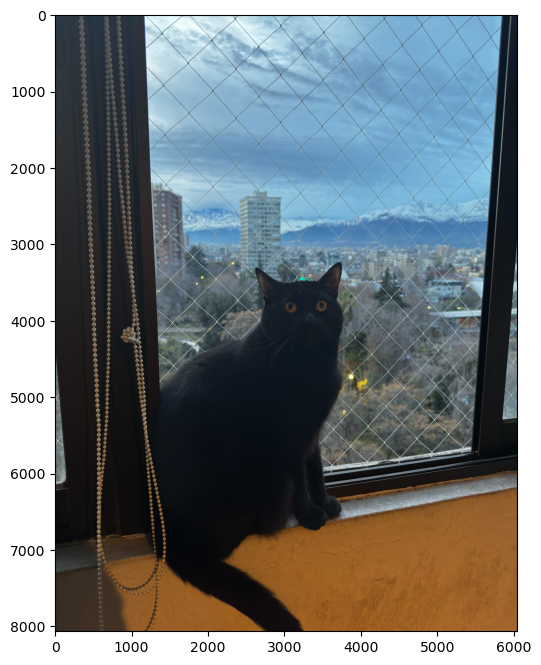

In [2]:
image_raw = imread("files/nim.jpg")

plt.figure(figsize=[10,8])
plt.imshow(image_raw)

In [5]:
image_raw

array([[[ 48,  62,  75],
        [ 46,  60,  73],
        [ 48,  62,  75],
        ...,
        [ 22,  31,  48],
        [ 20,  29,  46],
        [ 20,  29,  46]],

       [[ 53,  67,  80],
        [ 49,  63,  76],
        [ 49,  63,  76],
        ...,
        [ 23,  32,  49],
        [ 24,  33,  50],
        [ 24,  33,  50]],

       [[ 49,  63,  76],
        [ 47,  61,  74],
        [ 46,  60,  73],
        ...,
        [ 24,  33,  50],
        [ 26,  35,  52],
        [ 25,  34,  51]],

       ...,

       [[ 52,  42,  33],
        [ 53,  43,  34],
        [ 54,  44,  35],
        ...,
        [160, 101,  43],
        [163, 104,  46],
        [161, 102,  44]],

       [[ 54,  44,  35],
        [ 52,  42,  33],
        [ 52,  42,  33],
        ...,
        [159, 100,  42],
        [164, 105,  47],
        [164, 105,  47]],

       [[ 55,  45,  36],
        [ 53,  43,  34],
        [ 47,  37,  28],
        ...,
        [159, 100,  42],
        [165, 106,  48],
        [167, 108,  50]]

In [7]:
image_raw.shape

(8064, 6048, 3)

In [6]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)


(8064, 6048)


In [9]:
image_sum

array([[185, 179, 185, ..., 101,  95,  95],
       [200, 188, 188, ..., 104, 107, 107],
       [188, 182, 179, ..., 107, 113, 110],
       ...,
       [127, 130, 133, ..., 304, 313, 307],
       [133, 127, 127, ..., 301, 316, 316],
       [136, 130, 112, ..., 301, 319, 325]], dtype=uint64)

In [8]:
image_bw = image_sum/image_sum.max()
image_bw.shape

(8064, 6048)

In [10]:
image_bw

array([[0.24183007, 0.23398693, 0.24183007, ..., 0.13202614, 0.12418301,
        0.12418301],
       [0.26143791, 0.24575163, 0.24575163, ..., 0.13594771, 0.13986928,
        0.13986928],
       [0.24575163, 0.2379085 , 0.23398693, ..., 0.13986928, 0.14771242,
        0.14379085],
       ...,
       [0.16601307, 0.16993464, 0.17385621, ..., 0.39738562, 0.40915033,
        0.40130719],
       [0.17385621, 0.16601307, 0.16601307, ..., 0.39346405, 0.4130719 ,
        0.4130719 ],
       [0.17777778, 0.16993464, 0.14640523, ..., 0.39346405, 0.41699346,
        0.4248366 ]])

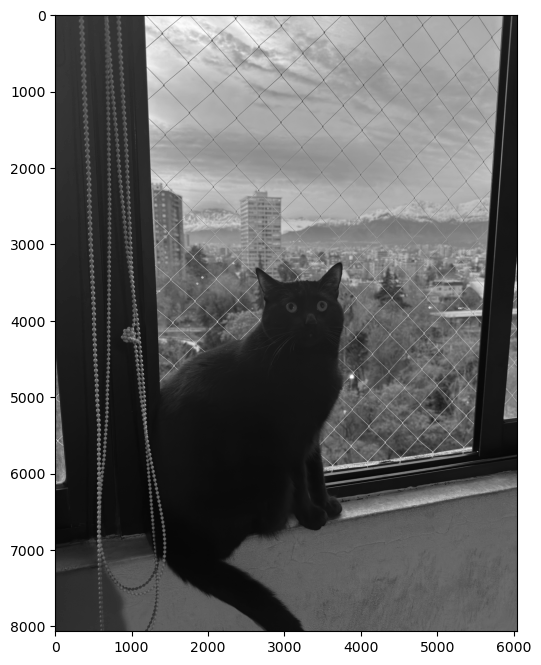

In [14]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [20]:
pca.explained_variance_ratio_

array([7.28058919e-01, 4.71375001e-02, 3.18237143e-02, ...,
       6.74046967e-10, 6.65386394e-10, 6.42621199e-10])

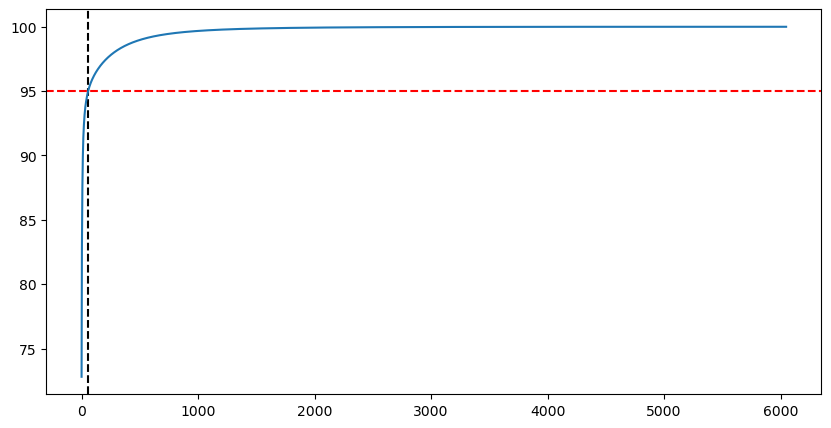

In [15]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
plt.figure(figsize=[10,5])
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [16]:
print(k)

57


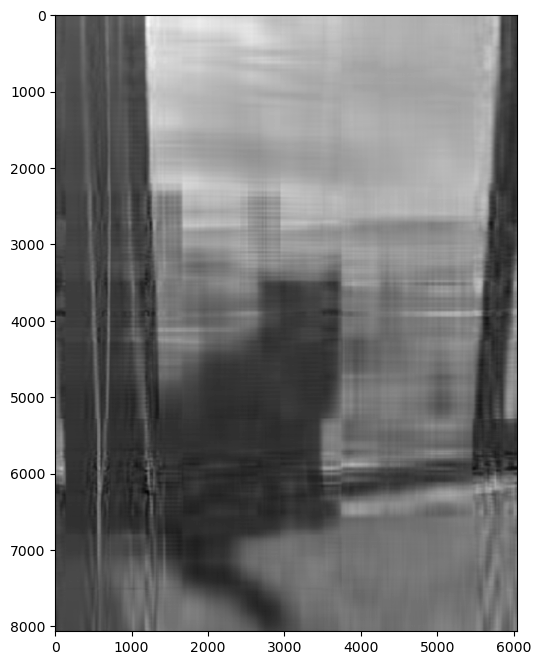

In [17]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

k = 10
plt.figure(figsize=[10,8])
plot_at_k(k)

In [19]:
ipca = IncrementalPCA(n_components=10)
ipca.fit_transform(image_bw)

array([[24.45410862,  1.85242625,  4.4193184 , ...,  1.49092645,
         1.26466227,  2.45648314],
       [24.60158605,  1.87573124,  4.41342747, ...,  1.52046604,
         1.26923556,  2.49016907],
       [24.52875094,  1.88797148,  4.37909406, ...,  1.51104712,
         1.27358792,  2.48944453],
       ...,
       [-4.47655922, -0.81071746,  4.82591959, ...,  1.54847097,
        -0.45703954,  2.46179639],
       [-4.51467261, -0.81548576,  4.82752315, ...,  1.54948388,
        -0.44455976,  2.41300912],
       [-4.53354031, -0.82551657,  4.83199619, ...,  1.56001639,
        -0.43524355,  2.4050934 ]])

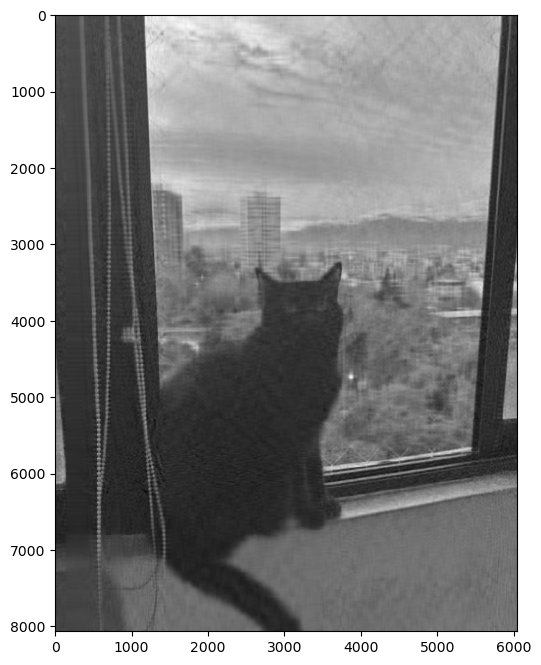

In [18]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

k = 50
plt.figure(figsize=[10,8])
plot_at_k(k)